### Vizualizing turtle as a PROV graph

In [1]:
from prov.model import ProvDocument
from prov.dot import prov_to_dot
from IPython.display import Image, display
import os

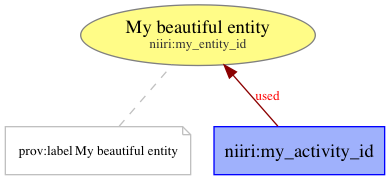

In [2]:
def viz_turtle(source=None, content=None, img_file=None, disp=True):
    prov_doc = ProvDocument.deserialize(source=source, content=content, format='rdf', rdf_format='turtle')

    dot = prov_to_dot(prov_doc, use_labels=True)
    dot.write_png(img_file)

    if disp:
        img = Image(img_file)
        display(img)

ttl_file = os.path.join('viz_examples', 'ttl_example.ttl')
viz_turtle(ttl_file, img_file='turtle-prov.png')

### Create equivalent JSON-LD 1.1 from turtle

In [3]:
# Create JSON-LD 1.1 version
jsonld11_file = os.path.join('viz_examples', 'jsonld11_example.jsonld')

import rdflib as rl
import pyld as ld
import json

g = rl.ConjunctiveGraph()
g.parse(ttl_file, format='turtle')
g2 = g.serialize(format='json-ld')

foo = ld.jsonld.compact(json.loads(g2), 
                        'https://raw.githubusercontent.com/incf-nidash/nidm/master/nidm/nidm-results/terms/nidmr.json')

with open(jsonld11_file, 'w') as out_file:
     out_file.write(json.dumps(foo, indent=2))

### Create vizualisation from JSON-LD 1.1

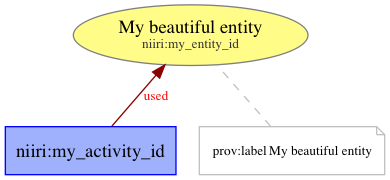

In [4]:
def viz_jsonld11(jsonld11_file, img_file, disp=True):
    
    minimal_context = {
      "@context": {
        "prov": "http://www.w3.org/ns/prov#", 
        "nidm": "http://purl.org/nidash/nidm#", 
        "niiri": "http://iri.nidash.org/"
      }
    }

    # Load graph from json-ld file as non 1.1 JSON-LD 
    aa=ld.jsonld.compact(
        json.load(open(jsonld11_file, 'r')), 
        minimal_context)

    g = rl.ConjunctiveGraph()
    g.parse(data=json.dumps(aa, indent=2), format='json-ld')

    viz_turtle(content=g.serialize(format='turtle').decode(), img_file=img_file, disp=disp)
    
viz_jsonld11(jsonld11_file, img_file=os.path.join('viz_examples', 'jsonld11-prov.png'))

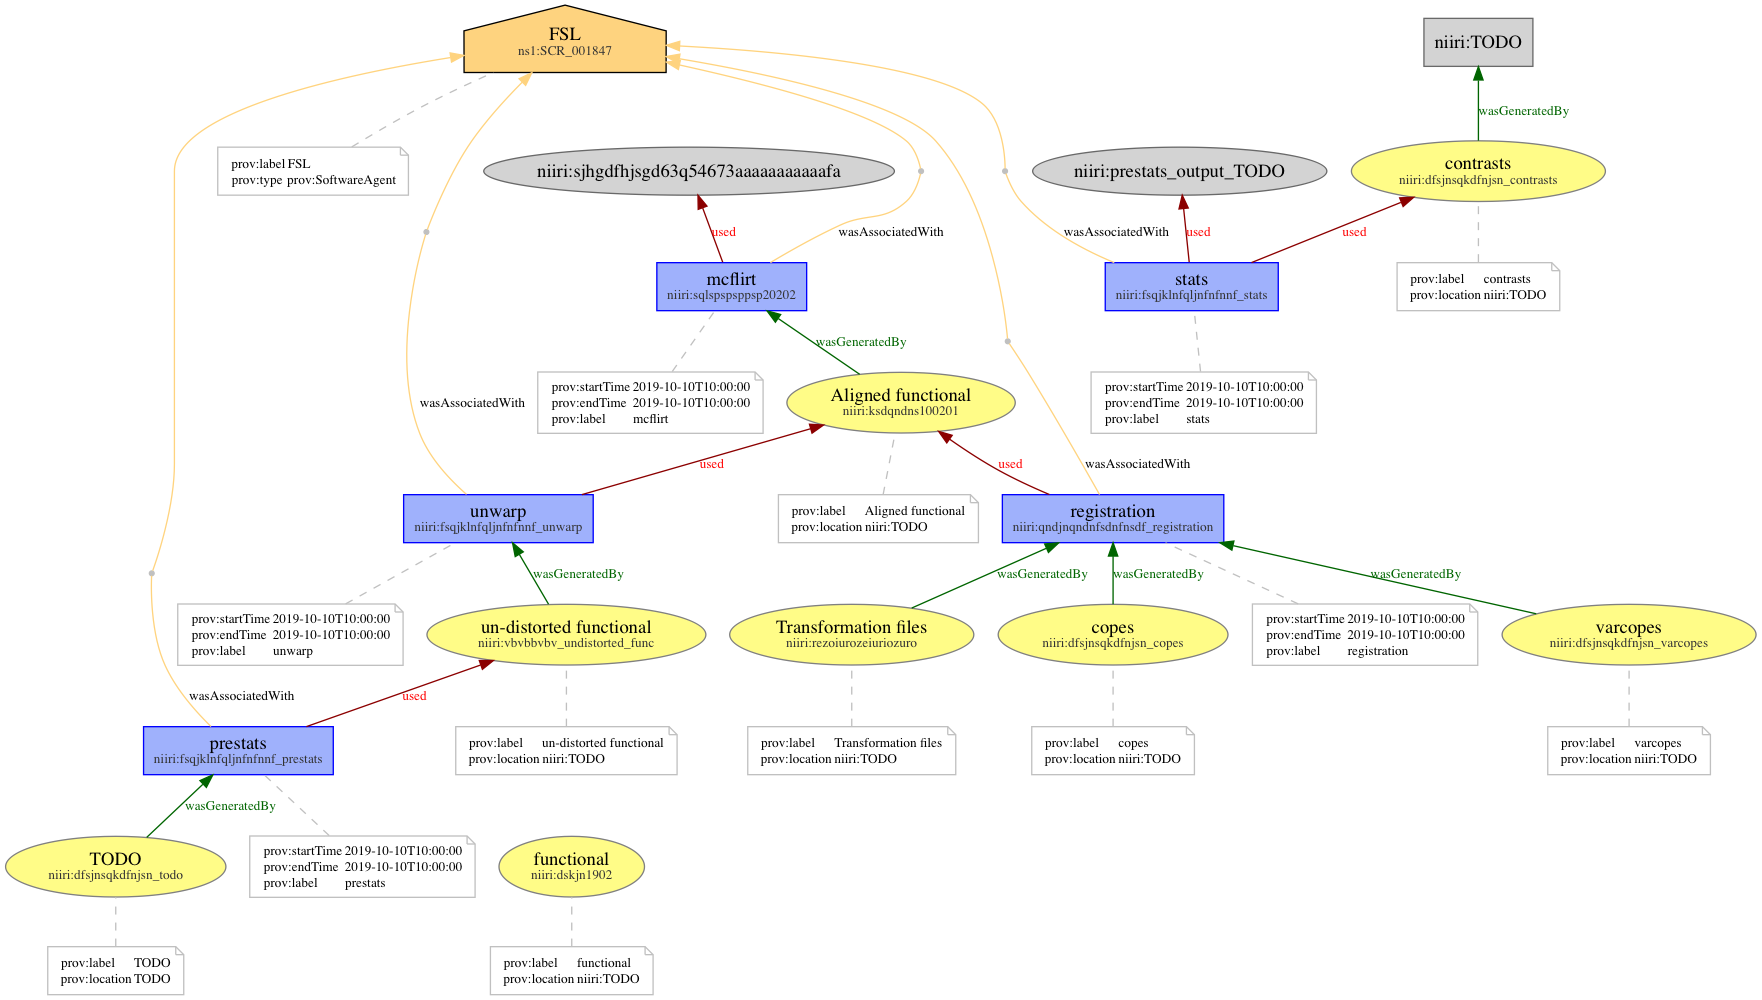

In [5]:
# An example with default.json
viz_jsonld11('default.json', img_file='fsl_default-prov.png')